#Trastorno de panico
dataset que busca si el paciente tiene trastorno de panico o no


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from scipy import optimize

%matplotlib inline

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Inteligencia Artificial 1/Examen 1/panic_disorder_dataset_training.csv")
df.head(10)

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0
5,6,38,Male,Yes,Yes,Moderate,Dizziness,Moderate,Significant,Urban,NaN,Bipolar disorder,Alcohol,Seeking therapy,Moderate,Exercise,0
6,7,63,Female,Yes,No,Low,Panic attacks,Mild,Significant,Urban,Asthma,Bipolar disorder,NaN,Meditation,Low,Diet,0
7,8,46,Male,No,Yes,High,Dizziness,Severe,Significant,Rural,NaN,Bipolar disorder,Drugs,Seeking therapy,Moderate,Exercise,0
8,9,21,Male,Yes,No,Moderate,Dizziness,Severe,Mild,Rural,Diabetes,Anxiety disorder,NaN,Meditation,High,Sleep quality,0
9,10,22,Female,No,No,High,Panic attacks,Moderate,Mild,Rural,NaN,NaN,Alcohol,Meditation,Low,Exercise,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Participant ID            100000 non-null  int64 
 1   Age                       100000 non-null  int64 
 2   Gender                    100000 non-null  object
 3   Family History            100000 non-null  object
 4   Personal History          100000 non-null  object
 5   Current Stressors         100000 non-null  object
 6   Symptoms                  100000 non-null  object
 7   Severity                  100000 non-null  object
 8   Impact on Life            100000 non-null  object
 9   Demographics              100000 non-null  object
 10  Medical History           74827 non-null   object
 11  Psychiatric History       75079 non-null   object
 12  Substance Use             66626 non-null   object
 13  Coping Mechanisms         100000 non-null  object
 14  Socia

In [5]:
# Convertir variables a numéricas utilizando one-hot
df = pd.get_dummies(df, columns=['Gender', 'Family History', 'Personal History', 'Demographics', 'Medical History', 'Psychiatric History', 'Substance Use', 'Coping Mechanisms', 'Social Support', 'Lifestyle Factors'])

df['Current Stressors'] = df['Current Stressors'].map({'Low': 1, 'Moderate': 2, 'High': 3})
df['Symptoms'] = df['Symptoms'].map({'Mild': 1, 'Moderate': 2, 'Severe': 3})
df['Severity'] = df['Severity'].map({'Mild': 1, 'Moderate': 2, 'Severe': 3})
df['Impact on Life'] = df['Impact on Life'].map({'Mild': 1, 'Moderate': 2, 'Significant': 3})

df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Participant ID                           100000 non-null  int64  
 1   Age                                      100000 non-null  int64  
 2   Current Stressors                        100000 non-null  int64  
 3   Symptoms                                 0 non-null       float64
 4   Severity                                 100000 non-null  int64  
 5   Impact on Life                           100000 non-null  int64  
 6   Panic Disorder Diagnosis                 100000 non-null  int64  
 7   Gender_Female                            100000 non-null  bool   
 8   Gender_Male                              100000 non-null  bool   
 9   Family History_No                        100000 non-null  bool   
 10  Family History_Yes               

In [6]:
df.head(100)

,Participant ID,Age,Current Stressors,Symptoms,Severity,Impact on Life,Panic Disorder Diagnosis,Gender_Female,Gender_Male,Family History_No,...,Coping Mechanisms_Exercise,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality
0,1,38,2,NaN,1,1,0,False,True,True,...,False,False,False,True,True,False,False,False,False,True
1,2,51,3,NaN,1,1,0,False,True,True,...,True,False,False,False,True,False,False,False,False,True
2,3,32,3,NaN,1,3,0,True,False,False,...,False,False,True,False,False,False,True,False,True,False
3,4,64,2,NaN,2,2,0,True,False,True,...,False,True,False,False,True,False,False,False,True,False
4,5,31,2,NaN,1,2,0,False,True,False,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,33,3,NaN,3,1,0,False,True,False,...,False,False,True,False,True,False,False,True,False,False
96,97,54,2,NaN,1,3,0,True,False,True,...,False,False,False,True,False,True,False,True,False,False
97,98,55,3,NaN,2,1,0,False,True,True,...,True,False,False,False,False,True,False,False,True,False
98,99,19,2,NaN,3,1,0,False,True,False,...,False,False,True,False,True,False,False,False,False,True


In [7]:
# Convertir las columnas booleanas a numéricas
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)

In [8]:
df.head(10)

,Participant ID,Age,Current Stressors,Symptoms,Severity,Impact on Life,Panic Disorder Diagnosis,Gender_Female,Gender_Male,Family History_No,...,Coping Mechanisms_Exercise,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality
0,1,38,2,NaN,1,1,0,0,1,1,...,0,0,0,1,1,0,0,0,0,1
1,2,51,3,NaN,1,1,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,3,32,3,NaN,1,3,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
3,4,64,2,NaN,2,2,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
4,5,31,2,NaN,1,2,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
5,6,38,2,NaN,2,3,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
6,7,63,1,NaN,1,3,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
7,8,46,3,NaN,3,3,0,0,1,1,...,0,0,1,0,0,0,1,0,1,0
8,9,21,2,NaN,3,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
9,10,22,3,NaN,2,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [9]:
columnas_eliminar = ['Symptoms','Participant ID']  # Lista de nombres de las columnas a eliminar
df = df.drop(columnas_eliminar, axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                                   Non-Null Count   Dtype
---  ------                                   --------------   -----
 0   Age                                      100000 non-null  int64
 1   Current Stressors                        100000 non-null  int64
 2   Severity                                 100000 non-null  int64
 3   Impact on Life                           100000 non-null  int64
 4   Panic Disorder Diagnosis                 100000 non-null  int64
 5   Gender_Female                            100000 non-null  int64
 6   Gender_Male                              100000 non-null  int64
 7   Family History_No                        100000 non-null  int64
 8   Family History_Yes                       100000 non-null  int64
 9   Personal History_No                      100000 non-null  int64
 10  Personal History_Yes                     100000 non-null 

In [11]:
# Calcular la cantidad de valores diferentes en una co
valores = df['Panic Disorder Diagnosis'].unique()
print(valores)

[0 1]


Separamos los datos- Caracteristicas "**X**" y  Variable objetivo "**y**" para usarlo mas adelante

In [12]:
# Extrae la columna 'Diabetes' y la asigna a la variable y
y = df['Panic Disorder Diagnosis'].values
# Elimina la columna 'Diabetes' de la matriz X
X = df.drop(columns=['Panic Disorder Diagnosis']).values

In [13]:
# Verificar si hay valores vacíos o nulos en la variable X
nulos_X = np.isnan(X).sum()
nulos_y = np.isnan(y).sum()

print('nulos en X:\n',nulos_X)
print('nulos en y:\n',nulos_y)

nulos en X:
 0
nulos en y:
 0


## **Calaculos**


# Funcion de la Sigmoide

In [14]:
def calcularSigmoide(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

agregamos la una primera columna de unos

In [15]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [16]:
#Revisamos
X

array([[ 1., 38.,  2., ...,  0.,  0.,  1.],
       [ 1., 51.,  3., ...,  0.,  0.,  1.],
       [ 1., 32.,  3., ...,  0.,  1.,  0.],
       ...,
       [ 1., 20.,  2., ...,  0.,  1.,  0.],
       [ 1., 56.,  3., ...,  0.,  0.,  1.],
       [ 1., 18.,  1., ...,  0.,  1.,  0.]])

## Normalizamos
nota: siempre normalizar

In [17]:
from sklearn.preprocessing import StandardScaler
# Crea un objeto StandardScaler
scaler = StandardScaler()
# Ajusta y transforma toda la matriz de características
X_norm = scaler.fit_transform(X)

In [18]:
# Revisamos
X_norm

array([[ 0.00000000e+00, -2.49603754e-01,  4.89489454e-04, ...,
        -7.07069658e-01, -7.11305881e-01,  1.42257016e+00],
       [ 0.00000000e+00,  6.89761329e-01,  1.22421312e+00, ...,
        -7.07069658e-01, -7.11305881e-01,  1.42257016e+00],
       [ 0.00000000e+00, -6.83156870e-01,  1.22421312e+00, ...,
        -7.07069658e-01,  1.40586494e+00, -7.02953028e-01],
       ...,
       [ 0.00000000e+00, -1.55026310e+00,  4.89489454e-04, ...,
        -7.07069658e-01,  1.40586494e+00, -7.02953028e-01],
       [ 0.00000000e+00,  1.05105559e+00,  1.22421312e+00, ...,
        -7.07069658e-01, -7.11305881e-01,  1.42257016e+00],
       [ 0.00000000e+00, -1.69478081e+00, -1.22323415e+00, ...,
        -7.07069658e-01,  1.40586494e+00, -7.02953028e-01]])

# Funcion Costo Gradiente

# Funcion de costo en una regresion logistica

In [19]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = calcularSigmoide(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [20]:
def calcularCostoR(theta, X, y, lambda_):
    m = y.size
    h = calcularSigmoide(X.dot(theta.T))
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + reg_term
    return J

# Funcion de Descenso por el Gradiente

La REGULARIZACION SOLO CAMBIA LA FUNCION DE COSTO

In [21]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = calcularSigmoide(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history


In [22]:
def descensoGradienteR(theta, X, y, alpha, lambda_, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        h = calcularSigmoide(X.dot(theta.T))
        reg_term = (lambda_ / m) * theta[1:]
        theta[0] = theta[0] - (alpha / m) * (h - y).dot(X[:, 0])
        theta[1:] = theta[1:] * (1 - alpha * (lambda_ / m)) - (alpha / m) * (h - y).dot(X[:, 1:])
        theta[1:] = theta[1:] - reg_term
        J_history.append(calcularCostoR(theta, X, y, lambda_))
    return theta, J_history

Separar el 80% de los datos para entrenamiento y el 20% para hacer las pruebas

In [23]:
from sklearn.model_selection import train_test_split
# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Configuracion de Hiperparametros para el entrenamiento del Modelo

theta calculado por el descenso por el gradiente: 
 [ 0.00000000e+00 -1.21839871e-04  7.70770510e-02  4.95646830e-02
  5.88288411e-02 -1.08299678e-03  1.08299678e-03 -2.30480717e-02
  2.30480717e-02 -2.58549915e-02  2.58549915e-02  9.98921323e-03
 -9.98921323e-03  9.62011355e-03  1.65067385e-02  9.38876205e-03
  9.80431350e-03  4.52790256e-03  6.18606074e-03  1.18011252e-02
  6.49121123e-03 -3.18282351e-02  8.69996552e-03  1.44011589e-02
  8.64689688e-03 -7.42845448e-03  1.24913064e-02 -5.04235368e-03
 -6.29378612e-02 -6.23555797e-02  1.25663029e-01]


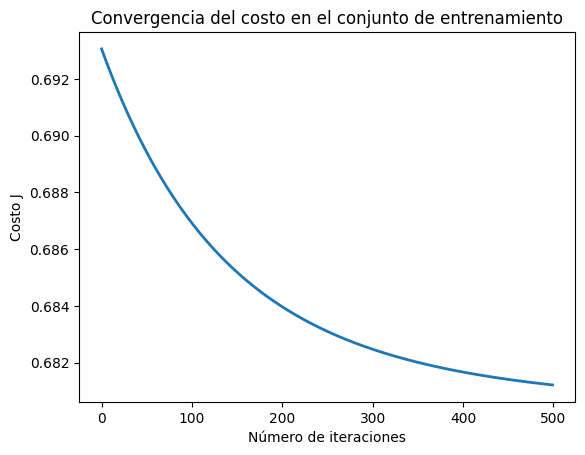

con un costo de: 0.6812193310056681 


In [24]:
# Configurar hiperparámetros y realizar descenso por el gradiente en el conjunto de entrenamiento
alpha = 0.01
num_iters = 500       #con 500 iteraciones ya tenemos una buena convergencia
lambda_= 50
theta = np.zeros(31)
#sin Regular
#theta, J_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)
#con regular
theta, J_history = descensoGradienteR(theta, X_train, y_train, alpha, lambda_, num_iters)

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: \n',(theta))


# Graficar la convergencia del costo en el conjunto de entrenamiento
pyplot.plot(np.arange(len(J_history)), (J_history), lw=2)

pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del costo en el conjunto de entrenamiento')
pyplot.show()

print(f"con un costo de: { J_history[-1]} ")

In [25]:
#Revisamos las dimensiones de X_normalizada
print(X_norm.shape)

(100000, 31)


In [26]:
#Revisamos las dimensiones de Theta
tita = pd.DataFrame(theta)
print(tita.shape)

(31, 1)


# Funcion para calcular la precision de las predicciones

In [27]:
def calcularPrecision(predictions, labels):
    # Convertir predicciones a etiquetas binarias (0 o 1)
    predictions_binary = (predictions >= 0.5).astype(int)

    # Calcular la precisión
    correct_predictions = np.sum(predictions_binary == labels)
    total_examples = len(labels)
    precision = correct_predictions / total_examples

    return precision

Y por ultimo Hacemos las predicciones con el otro 20% de datos faltantes para la evaluacion del Modelo

In [28]:
# Realizar predicciones en el conjunto de prueba
y_predicha = calcularSigmoide(np.dot(X_train, theta))

# Calcular la precisión utilizando la función calcularPrecision
precision_entrenamiento = calcularPrecision(y_predicha, y_train)

# Contar el número total de predicciones correctas
total_correct_predictions = np.sum((y_predicha >= 0.5).astype(int) == y_train)
total_incorrect_predictions = np.sum((y_predicha < 0.5).astype(int) == y_train)

# Imprimir resultados de las pruebas en el conjunto de prueba
print('Resultados en el conjunto de entrenamiento:')
print(f'Número total de predicciones correctas: {total_correct_predictions}')
print(f'Número total de predicciones incorrectas: {total_incorrect_predictions}')
print(f'Porcentaje de precisión: {precision_entrenamiento:.2%}')

Resultados en el conjunto de entrenamiento:
Número total de predicciones correctas: 48146
Número total de predicciones incorrectas: 31854
Porcentaje de precisión: 60.18%


In [29]:
# Realizar predicciones en el conjunto de prueba
y_predicha = calcularSigmoide(np.dot(X_test, theta))

# Calcular la precisión utilizando la función calcularPrecision
precision_test = calcularPrecision(y_predicha, y_test)

# Contar el número total de predicciones correctas
total_correct_predictions = np.sum((y_predicha >= 0.5).astype(int) == y_test)
total_incorrect_predictions = np.sum((y_predicha < 0.5).astype(int) == y_test)

# Imprimir resultados de las pruebas en el conjunto de prueba
print('Resultados en el conjunto de prueba:')
print(f'Número total de predicciones correctas: {total_correct_predictions}')
print(f'Número total de predicciones incorrectas: {total_incorrect_predictions}')
print(f'Porcentaje de precisión: {precision_test:.2%}')

Resultados en el conjunto de prueba:
Número total de predicciones correctas: 11974
Número total de predicciones incorrectas: 8026
Porcentaje de precisión: 59.87%
